Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1080, 1920, 3)


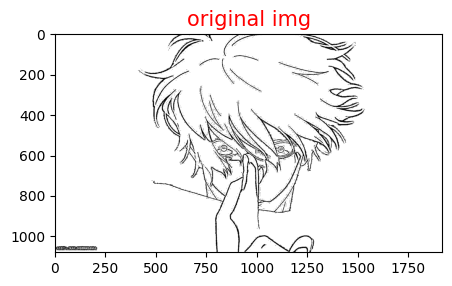

In [36]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
def change(img):  #對影像灰階值做倒數
    nr, nc = img.shape[:2]
    new_img = np.zeros((nr, nc), np.uint8)  #建立一新影像且灰階值為0

    for x in range(nr):
        for y in range(nc):
            if img[x][y] == 0:  #若傳進來的影像目前位置灰階值為0，則新影像同樣位置灰階值設為1
                new_img[x][y] = 255

    return new_img  #回傳該影像
def reduce_noise(img, edges, radius):  #若灰階影像中各相素點半徑(radius)內邊緣影像有值則將其保留，若否則將該相素點刪除
    nr, nc = img.shape[:2]
    new_img = img.copy()  #複製一新影像
    has_edges = 0  #檢測半徑內是否有邊緣資訊
    edges_x = edges_y = 0  #紀錄半徑內的X,Y軸的值

    for x in range(nr):
        for y in range(nc):
            if img[x][y] == 0:
                for round_x in range(2 * radius + 1):  #檢測目前位置加上或減去半徑後是否會超過影像範圍
                    for round_y in range(2 * radius + 1):
                        if (x - radius + round_x) < 0:
                            edges_x = 0

                        elif (x - radius + round_x) >= nr:
                            edges_x = nr - 1

                        else:
                            edges_x = x - radius + round_x

                        if (y - radius + round_y) < 0:
                            edges_y = 0

                        elif (y - radius + round_y) >= nc:
                            edges_y = nc - 1

                        else:
                            edges_y = y - radius + round_y

                        if edges[edges_x][edges_y] == 0:  #若在半徑內有邊緣資訊，則記錄有邊緣
                          has_edges = 1

            if has_edges == 0:  #若半徑內無邊緣資訊則將新影像的該點的灰階值設為255
                new_img[x][y] = 255

            has_edges = 0

    return new_img
img = cv2.imread("/content/drive/My Drive/a123.jpeg", -1)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gaussian_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
edges_img = cv2.Canny(gaussian_img, 5, 90)  #影像邊緣偵測
edges_img = change(edges_img)  #影像邊緣偵測
adaptive_theshold_gaussian = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)  #將影像透過高斯法的適應性閥值化來將灰階影像變為只有黑白兩色
reduce_noise_img = reduce_noise(adaptive_theshold_gaussian, edges_img, 6)  #透過邊緣資訊來將不必要的地方刪除
print(img.shape)
plt.figure(figsize = (5, 5))
plt.title('original img', fontsize = 15, color = 'r')
plt.imshow(reduce_noise_img, cmap = 'gray')

請輸入你的參數(a),不超過10：5


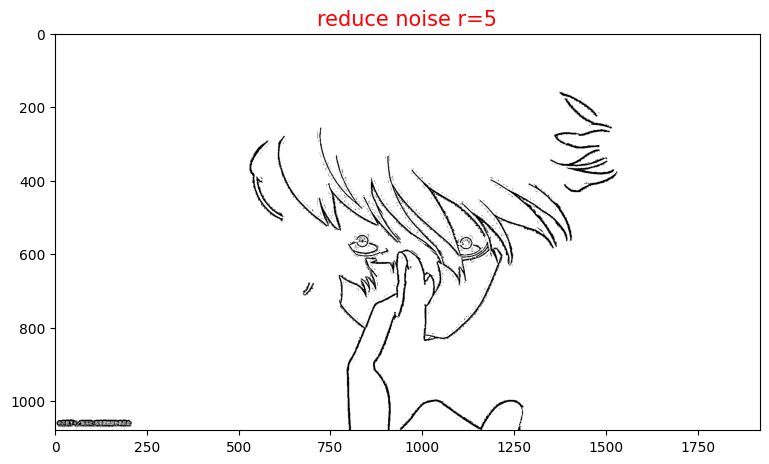

In [35]:
c=int(input("請輸入你的參數(a),不超過10："))
r1 = reduce_noise(adaptive_theshold_gaussian, edges_img, c)


plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 2)
plt.title("reduce noise r="+str(c), fontsize = 15, color = 'r')
plt.imshow(r1, cmap = 'gray')
plt.tight_layout()



請輸入你的參數(a),不超過30：10
請輸入你的參數(b),不超過30：10


<Figure size 800x800 with 0 Axes>

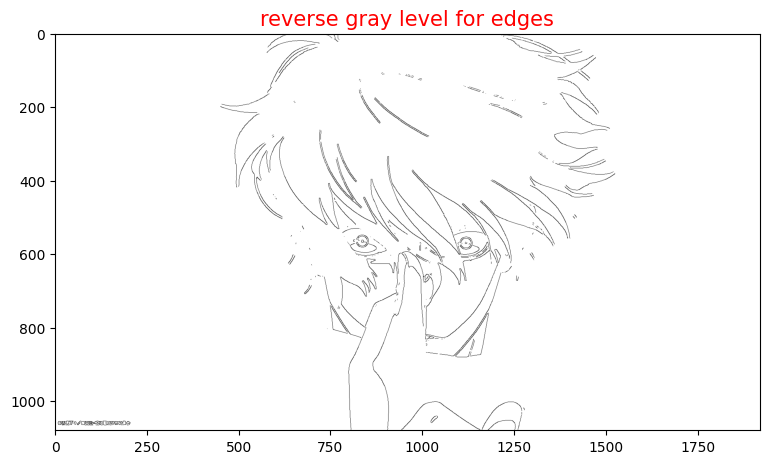

In [33]:
def change(img):  #對影像灰階值做倒數
    nr, nc = img.shape[:2]
    new_img = np.zeros((nr, nc), np.uint8)  #建立一新影像且灰階值為0

    for x in range(nr):
        for y in range(nc):
            if img[x][y] == 0:  #若傳進來的影像目前位置灰階值為0，則新影像同樣位置灰階值設為1
                new_img[x][y] = 255

    return new_img  #回傳該影像

plt.figure(figsize = (8, 8))
a=int(input("請輸入你的參數(a),不超過30："))
b=int(input("請輸入你的參數(b),不超過30："))
a=a*10
b=b*10
r0 = cv2.Canny(gaussian_img, a, b)#影像邊緣偵測
plt.figure(figsize = (15, 10))

r0 = change(r0) #因為Canny所生成之邊緣影像的邊緣為白色背景為黑色，故將其顛倒
plt.subplot(1, 2, 2)
plt.title("reverse gray level for edges", fontsize = 15, color = 'r')
plt.imshow(r0, cmap = 'gray')

plt.tight_layout()